## **1. Installation**

Load your dataset

In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
%matplotlib inline

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-06-19 11:06:37--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.05s   

2022-06-19 11:06:37 (24.0 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   cr

## **2. Image Dataset**

Load your annotated dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *

# Extract Images
images_path = "/content/drive/MyDrive/cow3/dataset.zip"
annotations_path = "/content/drive/MyDrive/cow3/anotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")


VERS 0.2


Using TensorFlow backend.


... done downloading pretrained model!
Extracted: 205 images


In [4]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/cow3/anotations.json
Annotation json path:  /content/drive/MyDrive/cow3/anotations.json
Train: 183
Validation: 22
Classes: 1


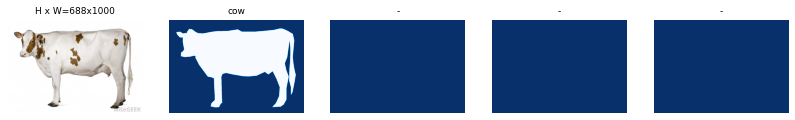

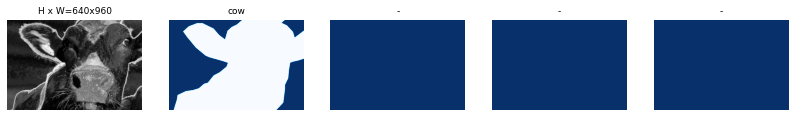

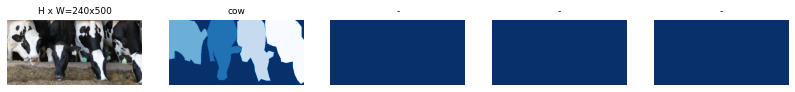

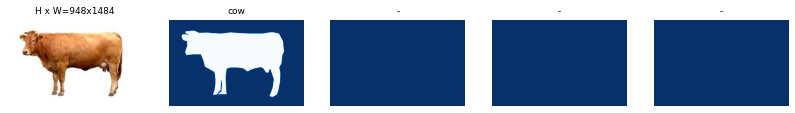

In [15]:
# Load image samples
display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [16]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [17]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220619T1110/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

## **4. Detection (test your model on a random image)**

In [20]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220619T1110/mask_rcnn_object_0030.h5
Re-starting from epoch 30


original_image           shape: (512, 512, 3)         min:    0.00000  max:  251.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  251.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  136.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


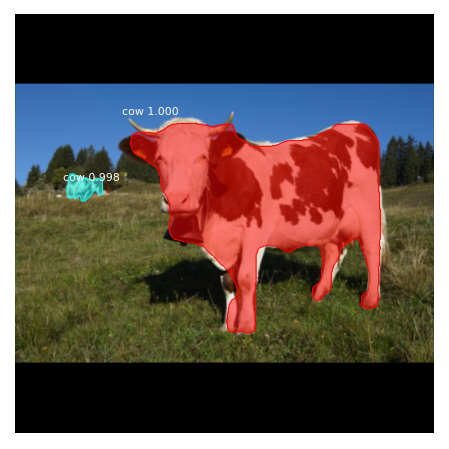

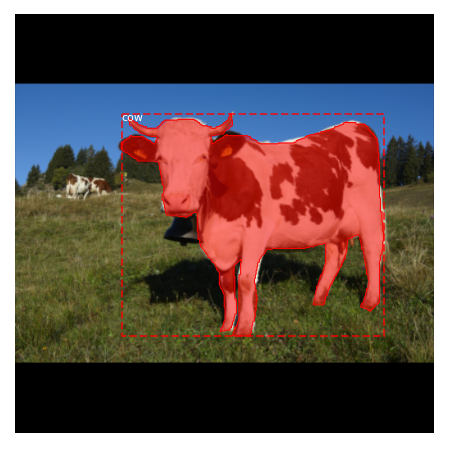

In [40]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

In [19]:
!zip -r /content/drive/MyDrive/cow3/weight_h5_30.zip /content/Mask_RCNN/logs/object20220619T1110/mask_rcnn_object_0030.h5


  adding: content/Mask_RCNN/logs/object20220619T1110/mask_rcnn_object_0030.h5 (deflated 7%)
